Water Quality Analysis data set reading
---



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from math import floor,ceil
import tabulate as tb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# Dataset Analysis

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.isnull().sum()
# From this we can analyze that ph,Sulfate and Trih
alomethanes has null values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
miss_per = df.isnull().sum() * 100 / len(df)
missing = pd.DataFrame({'column_name': df.columns,'percent_missing': miss_per})
missing.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
Sulfate,Sulfate,23.840049
ph,ph,14.987790
Trihalomethanes,Trihalomethanes,4.945055
Hardness,Hardness,0.000000
Solids,Solids,0.000000
Chloramines,Chloramines,0.000000
Conductivity,Conductivity,0.000000
Organic_carbon,Organic_carbon,0.000000
Turbidity,Turbidity,0.000000
Potability,Potability,0.000000


# Null Values handling

In [ ]:
df[:] = SimpleImputer(strategy='median').fit_transform(df)


In [ ]:
miss_per = df.isnull().sum() * 100 / len(df)
missing = pd.DataFrame({'column_name': df.columns,'percent_missing': miss_per})
missing.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
ph,ph,0.0
Hardness,Hardness,0.0
Solids,Solids,0.0
Chloramines,Chloramines,0.0
Sulfate,Sulfate,0.0
Conductivity,Conductivity,0.0
Organic_carbon,Organic_carbon,0.0
Trihalomethanes,Trihalomethanes,0.0
Turbidity,Turbidity,0.0
Potability,Potability,0.0


# Data Normalization

In [ ]:
data=pd.read_csv("water_potability.csv")
data[:] = SimpleImputer(strategy='median').fit_transform(data)


In [ ]:
def normalization(dft, col):
    dft[col] = [ (i-dft[col].min())/(dft[col].max()-dft[col].min()) for i in dft[col]]

columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
for column in columns:
    normalization(data, column)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


# Vizualization

In [ ]:
df.Potability.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

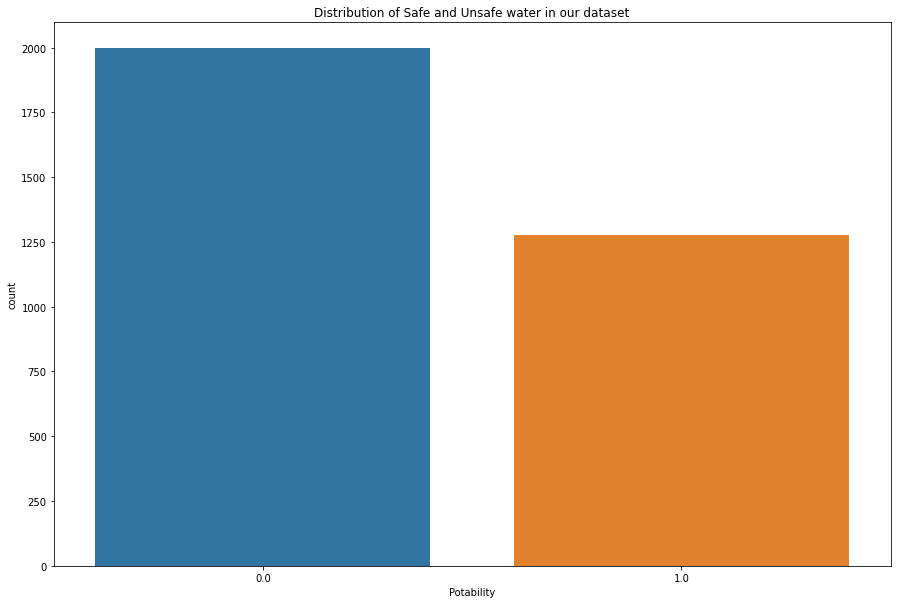

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data.Potability)
plt.title("Distribution of Safe and Unsafe water in our dataset")
plt.show()

Text(0, 0.5, '')

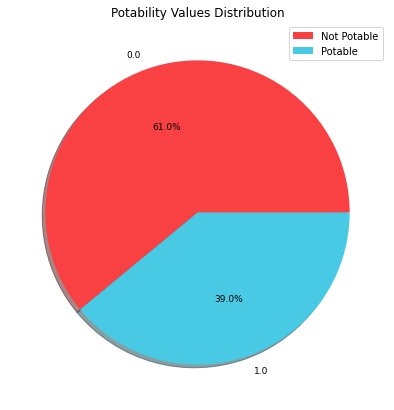

In [ ]:
colors=['#f94144', '#48cae4']
labels=['Not Potable','Potable']
pieplot = df.groupby('Potability').size()
pieplot.plot(kind='pie', colors=colors, subplots=True,shadow=True, figsize=(7, 7), fontsize=9, autopct='%1.1f%%')
plt.title("Potability Values Distribution")
plt.legend(labels)
plt.ylabel("")

This dataset is not balanced because samples of 0s are more than 1s

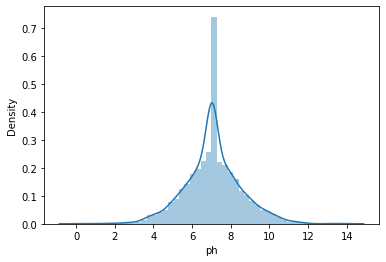

In [ ]:
sns.distplot(df['ph'])
plt.show()

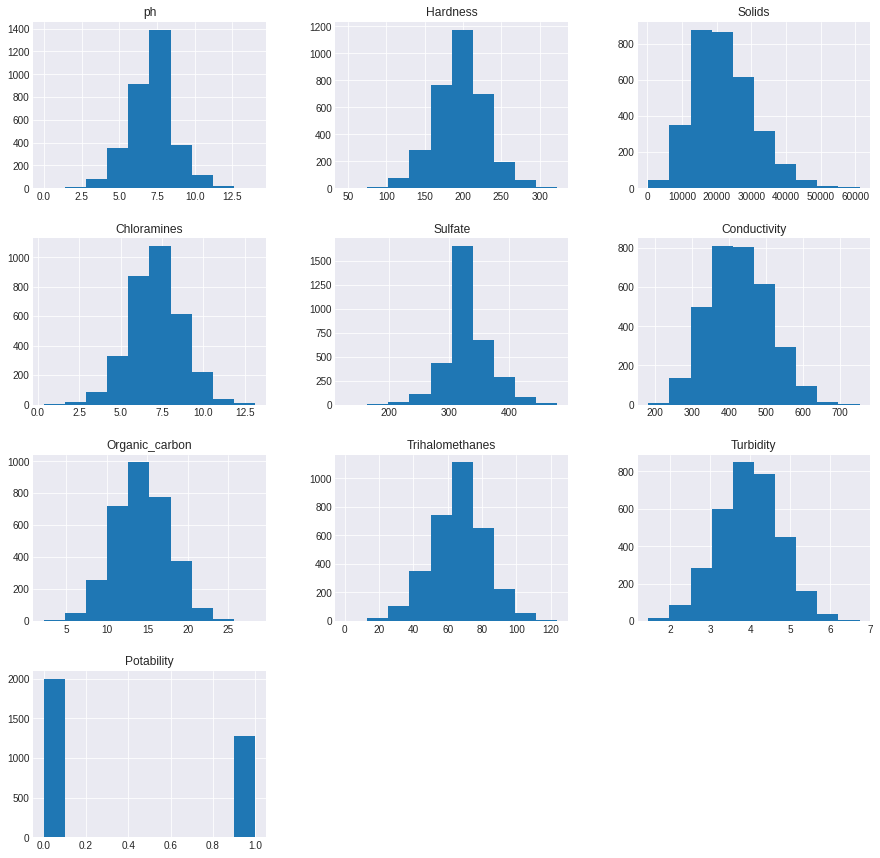

In [ ]:
df.hist(figsize=(15,15))
plt.show()


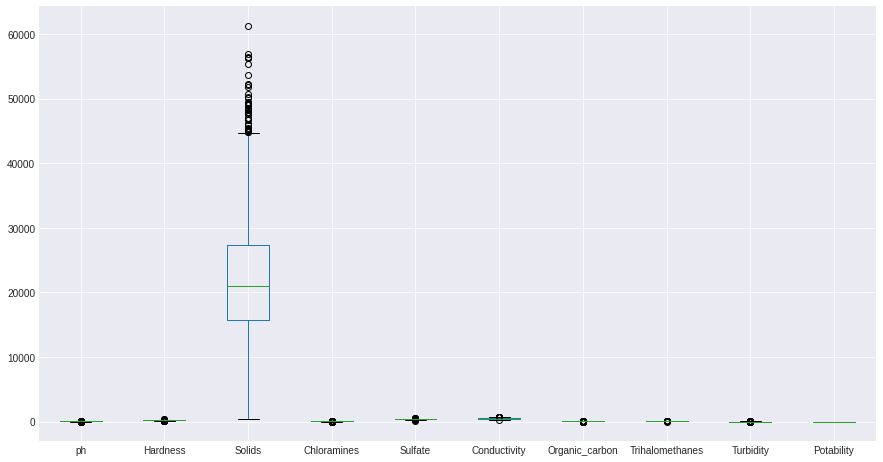

In [ ]:
df.boxplot(figsize=(15,8))


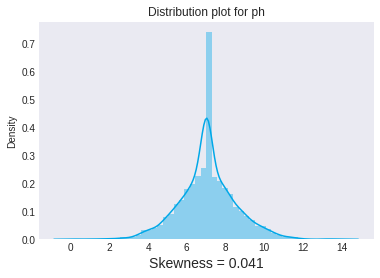

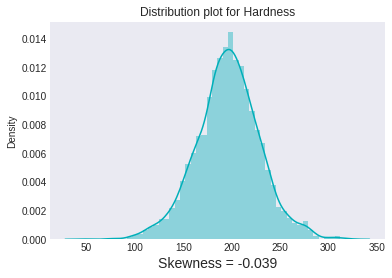

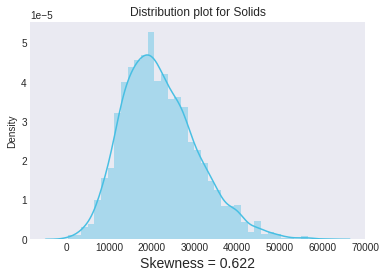

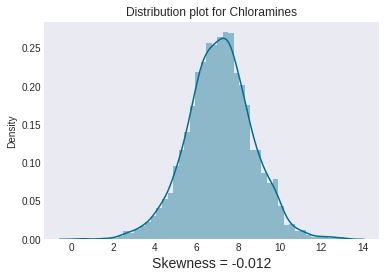

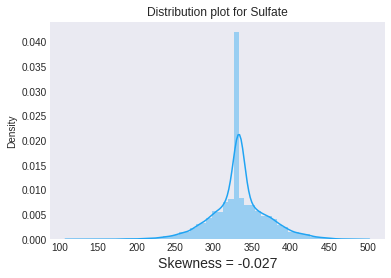

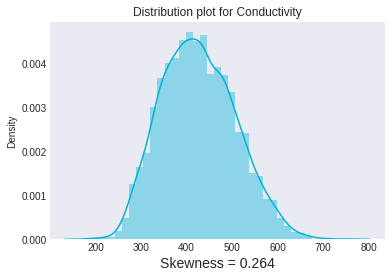

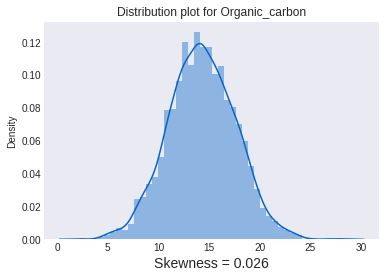

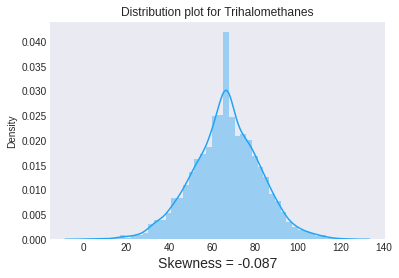

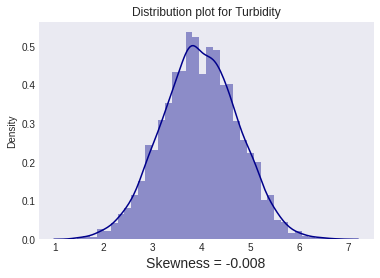

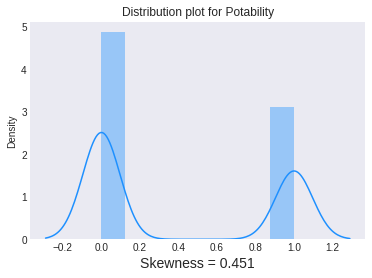

In [ ]:
# Skewness

plt.style.use('seaborn-dark')
c=['#00a8e8', '#00afb9',  '#48bfe3', '#006e90', '#20a4f3', '#00b4d8', '#0466c8', '#20a4f3', '#00008B','#1E90FF']
i=0
while i<10:
    for col in df.columns:
        plt.figure(figsize=(6,4))
        sns.distplot(df[col],color=c[i])
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(f'Skewness = {round(df[col].skew(),3)}',fontsize=14)
        i+=1
        plt.show()

# Modelling

In [ ]:
pip install pycaret

In [ ]:
cor = data.corr()
cor["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.075760
Organic_carbon     0.040240
Conductivity       0.017466
Sulfate            0.014178
Trihalomethanes    0.003145
Potability        -0.003014
Chloramines       -0.031741
Turbidity         -0.036107
Solids            -0.082004
Name: ph, dtype: float64

In [ ]:
test_data=df.Potability
train_data=df.drop('Potability',axis=1)
print(test_data)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3271    1.0
3272    1.0
3273    1.0
3274    1.0
3275    1.0
Name: Potability, Length: 3276, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=101)

In [ ]:
l=[]
names=[]
for col in train_data.columns:
    names.append(col)
    l.append(f'{floor(train_data[col].min())} to {ceil(train_data[col].max())}')

t = pd.DataFrame(list(zip(names,l)),columns =['Name', 'Range'])
print(tb.tabulate(t, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------+
|   |      Name       |    Range     |
+---+-----------------+--------------+
| 0 |       ph        |   0 to 14    |
| 1 |    Hardness     |  47 to 324   |
| 2 |     Solids      | 320 to 61228 |
| 3 |   Chloramines   |   0 to 14    |
| 4 |     Sulfate     |  129 to 482  |
| 5 |  Conductivity   |  181 to 754  |
| 6 | Organic_carbon  |   2 to 29    |
| 7 | Trihalomethanes |   0 to 124   |
| 8 |    Turbidity    |    1 to 7    |
+---+-----------------+--------------+


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))

In [ ]:
mo =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DT", DecisionTreeClassifier()), ('RF',RandomForestClassifier())]

res = []
names = []
finalResults = []

for name,model in mo:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    res.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('SVC', 0.7079917133376639),
 ('RF', 0.6852159468438539),
 ('KNN', 0.6266588981679291),
 ('DT', 0.551219512195122),
 ('LR', 0.30640243902439024)]

In [ ]:
# SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
g_svc = GridSearchCV(SVC(), param_grid, refit = True)
g_svc.fit(X_train, y_train)


svc_predict=g_svc.predict(X_test)
sv_acc=accuracy_score(y_test,svc_predict)
print(f'Accuracy = {sv_acc}')
print(classification_report(y_test, svc_predict))

Accuracy = 0.6920731707317073
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       402
         1.0       0.77      0.30      0.43       254

    accuracy                           0.69       656
   macro avg       0.72      0.62      0.61       656
weighted avg       0.71      0.69      0.65       656



In [ ]:
# Random Forest


rf_param = {'bootstrap': [True, False],
 'max_depth': [30, 40, 50],
 'min_samples_leaf': [3,5],
 'min_samples_split': [5],
 'max_features':['auto','sqrt','log2'],
 'n_estimators': [500]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = rf_param, cv = 3)
rf_grid.fit(X_train, y_train)

rf_predict=rf_grid.predict(X_test)
rf_acc=accuracy_score(y_test,rf_predict)
print(f'Accuracy = {rf_acc}')
print(classification_report(y_test, rf_predict))

Accuracy = 0.6859756097560976
              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       402
         1.0       0.68      0.36      0.47       254

    accuracy                           0.69       656
   macro avg       0.68      0.63      0.62       656
weighted avg       0.68      0.69      0.66       656

